In [10]:
import numpy as np                 # Para operaciones numéricas y manipulación de matrices
import pandas as pd                # Para análisis y manipulación de datos tabulares
import matplotlib.pyplot as plt 
import seaborn as sns
   # Visualización de datos

%matplotlib inline

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [7]:
df.head()

,trending_date,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,state,lat,lon,geometry,Country,category_name
0,2017-11-13 18:30:00+00:00,Lokdhun Punjabi,1096327,33966,798,882,False,False,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878),IN,Film & Animation
2,2017-11-13 18:30:00+00:00,TFPC,473988,2011,243,149,False,False,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819),IN,Entertainment
3,2017-11-13 18:30:00+00:00,Eruma Saani,1242680,70353,1624,2684,False,False,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979),IN,Comedy
4,2017-11-13 18:30:00+00:00,Filmylooks,464015,492,293,66,False,False,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545),IN,Entertainment
5,2017-11-13 18:30:00+00:00,Dil Raju,6106669,98612,4185,4763,False,False,Meghalaya,25.570492,91.880014,POINT (91.88001420000001 25.57049217),IN,Entertainment


In [6]:
df = df[(df['comments_disabled'] == False)  & ( df['ratings_disabled'] == False)]

In [8]:
df = df[['views', 'likes', 'dislikes', 'comment_count']]

In [9]:
df.head()

,views,likes,dislikes,comment_count
0,1096327,33966,798,882
2,473988,2011,243,149
3,1242680,70353,1624,2684
4,464015,492,293,66
5,6106669,98612,4185,4763


<Axes: >

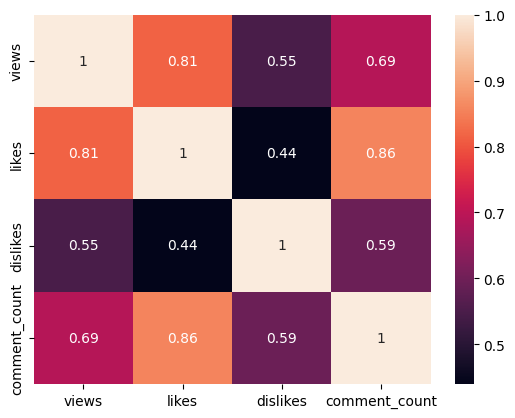

In [11]:
sns.heatmap(df.corr(), annot=True)

In [13]:
import scipy.stats as stats

In [17]:
names = list(df.columns)
names

['views', 'likes', 'dislikes', 'comment_count']

In [18]:
for i in range(0, len(names)):
    for j in range(i+1, len(names)):
        print(names[i], names[j], stats.pearsonr(df[names[i]], df[names[j]]))

views likes PearsonRResult(statistic=0.8149305333272218, pvalue=0.0)
views dislikes PearsonRResult(statistic=0.5479849148529977, pvalue=0.0)
views comment_count PearsonRResult(statistic=0.6908571263839454, pvalue=0.0)
likes dislikes PearsonRResult(statistic=0.43932585827496107, pvalue=0.0)
likes comment_count PearsonRResult(statistic=0.8571684722440152, pvalue=0.0)
dislikes comment_count PearsonRResult(statistic=0.5934064525115796, pvalue=0.0)


In [19]:
from sklearn.model_selection import train_test_split

# Likes

In [ ]:
X = df[['views', 'comment_count']]
y = df['likes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
likes_predict = LinearRegression()

In [ ]:
likes_predict.fit(X_train, y_train)

LinearRegression()

In [ ]:
likes_predict.coef_ , likes_predict.intercept_

(array([0.01744238, 3.21495034]), 1411.426149803263)

In [ ]:
likes_predict.score(X_test, y_test)

0.838230553752292

# Dislikes

In [40]:
X = df[['views', 'comment_count']]
y = df['dislikes']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [47]:
dislikes_predict = LinearRegression()

In [48]:
dislikes_predict.fit(X_train, y_train)

LinearRegression()

In [49]:
dislikes_predict.coef_ , dislikes_predict.intercept_

(array([0.00137239, 0.36776441]), -399.0765124043171)

In [50]:
dislikes_predict.score(X_test, y_test)

0.3392116170281603

# Views

In [53]:
X = df[['likes', 'comment_count']]
y = df['views']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
views_predict = LinearRegression()

In [56]:
views_predict.fit(X_train, y_train)

LinearRegression()

In [57]:
views_predict.coef_ , views_predict.intercept_

(array([20.25934329, -1.55531142]), 166535.81369448523)

In [58]:
views_predict.score(X_test, y_test)

0.6637052250621169